# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
%matplotlib inline
import seaborn as sb
sb.set_style('whitegrid')

# Important Variables

In [3]:
TEAM_NAME = 'India'
PLAYER_NAME = 'Virat Kohli'
DROPFILE = 1202242

# Getting Team Match Numbers

In [4]:
# getting the file with all the matches information
address = r'C:\Users\Mohit\Desktop\ML-Cricket-Integration-Project\Data\INTERNATIONAL_MATCH.csv'

data = pd.read_csv(address)
data[0:10]

,Team_1,Team_1_number,Team_2,Team_2_number,Winner_team,Winner_team_number,Margin,Ground,Ground_number,Match Date,Scorecard,Match_number,Match_Type
0,Mum Indians,335978.0,Supergiants,968721.0,Supergiants,968721.0,9 wickets,Mumbai,58324.0,"Apr 9, 2016",T20,980901.0,IPL
1,KKR,335971.0,Daredevils,335975.0,KKR,335971.0,9 wickets,Kolkata,57980.0,"Apr 10, 2016",T20,980903.0,IPL
2,Kings XI,335973.0,Guj Lions,968725.0,Guj Lions,968725.0,5 wickets,Mohali,57991.0,"Apr 11, 2016",T20,980905.0,IPL
3,RCB,335970.0,Sunrisers,628333.0,RCB,335970.0,45 runs,Bengaluru,57897.0,"Apr 12, 2016",T20,980907.0,IPL
4,KKR,335971.0,Mum Indians,335978.0,Mum Indians,335978.0,6 wickets,Kolkata,57980.0,"Apr 13, 2016",T20,980909.0,IPL
5,Guj Lions,968725.0,Supergiants,968721.0,Guj Lions,968725.0,7 wickets,Rajkot,377285.0,"Apr 14, 2016",T20,980911.0,IPL
6,Daredevils,335975.0,Kings XI,335973.0,Daredevils,335975.0,8 wickets,Delhi,58040.0,"Apr 15, 2016",T20,980913.0,IPL
7,Sunrisers,628333.0,KKR,335971.0,KKR,335971.0,8 wickets,Hyderabad (Deccan),58142.0,"Apr 16, 2016",T20,980915.0,IPL
8,Mum Indians,335978.0,Guj Lions,968725.0,Guj Lions,968725.0,3 wickets,Mumbai,58324.0,"Apr 16, 2016",T20,980917.0,IPL
9,Kings XI,335973.0,Supergiants,968721.0,Kings XI,335973.0,6 wickets,Mohali,57991.0,"Apr 17, 2016",T20,980919.0,IPL


In [5]:
# getting all the matches that the Team has played in his dataset
team_matches1 = data[data['Team_1'] == TEAM_NAME]
team_matches2 = data[data['Team_2'] == TEAM_NAME]

# merging the 2 dataframes
matches = [team_matches1, team_matches2]
team_matches = pd.concat(matches)
team_matches.head()

,Team_1,Team_1_number,Team_2,Team_2_number,Winner_team,Winner_team_number,Margin,Ground,Ground_number,Match Date,Scorecard,Match_number,Match_Type
646,India,6.0,Bangladesh,25.0,India,6.0,208 runs,Hyderabad (Deccan),58142.0,"Feb 9-13, 2017",Test # 2249,1041761.0,TEST_MATCH
647,India,6.0,Australia,2.0,Australia,2.0,333 runs,Pune,545380.0,"Feb 23-25, 2017",Test # 2250,1062573.0,TEST_MATCH
648,India,6.0,Australia,2.0,India,6.0,75 runs,Bengaluru,57897.0,"Mar 4-7, 2017",Test # 2251,1062574.0,TEST_MATCH
653,India,6.0,Australia,2.0,drawn,NaN,NaN,Ranchi,485865.0,"Mar 16-20, 2017",Test # 2256,1062575.0,TEST_MATCH
655,India,6.0,Australia,2.0,India,6.0,8 wickets,Dharamsala,58056.0,"Mar 25-28, 2017",Test # 2258,1062576.0,TEST_MATCH


In [6]:
# getting the match numbers because that is what we need to find out specific files for specific matches
team_match_nums = team_matches['Match_number']
team_match_nums.head() # is a Series (not a DataFrame)

646    1041761.0
647    1062573.0
648    1062574.0
653    1062575.0
655    1062576.0
Name: Match_number, dtype: float64

# Revision of Data

In [7]:
# Casting all the match numbers to ints (not floats) so it's easy to work with the numbers
team_match_nums = team_match_nums.astype(int)

In [8]:
# Removing duplicates if there are any (there are none)
team_match_nums = team_match_nums.drop_duplicates()

In [9]:
# Removing any N/A values if there are any (there are none)
team_match_nums = team_match_nums.dropna()

In [10]:
index_specific = team_match_nums[team_match_nums == DROPFILE].index

# Removing 1202242 from match numbers because it doesn't have a corresponding match
team_match_nums = team_match_nums.drop(index = index_specific)

In [11]:
# changing the index of team_match_nums Series to start from 0
team_match_nums.index = np.arange(len(team_match_nums))
team_match_nums.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            184, 185, 186, 187, 188, 189, 190, 191, 192, 193],
           dtype='int64', length=194)

# Getting Balls played by Player & Location & Format of Each Game

In [25]:
player_balls = pd.DataFrame()

# Looping through the matches
# Getting all balls played by the player as well as the location of each match and appending that to player_balls dataframe
for match_num in team_match_nums:
    match_address = r'C:\Users\Mohit\Desktop\ML-Cricket-Integration-Project\Data\COMMENTARY_INTL_MATCH\COMMENTARY_INTL_MATCH\{}_COMMENTARY.csv'.format(match_num)
    match = pd.read_csv(match_address)
    match_player_balls = match[match['Batsman_name'] == PLAYER_NAME]

    # Getting the location of each match
    loc = []
    for i in range(0, len(match_player_balls)):
        loc.append(data[data['Match_number'] == match_num]['Ground'].values[0])
    
    # Getting the format of each match
    format = []
    for i in range(0, len(match_player_balls)):
        format.append(data[data['Match_number'] == match_num]['Scorecard'].values[0])
    
    # Adding location as a column to the match dataframe
    match_player_balls.insert(loc = 0, column = 'Location', value = loc)

    # Adding format as a column to match dataframe
    match_player_balls.insert(loc = 0, column = 'Format', value = format)

    # appending match balls to all player balls
    player_balls = player_balls.append(match_player_balls)

In [26]:
player_balls.head()

,Format,Location,PlayType_description,Batting_Team_id,Batting_Team_name,Bowling_Team_id,Bowling_Team_name,Innings,Total_Runs_on_delivery,Commentary,...,Innings_run_rate,Innings_byes,Innings_balls,Innings_no_balls,Innings_wickets,Innings_leg_byes,Innings_session,Innings_day,Innings_wides,Innings_runs
307,Test # 2249,Hyderabad (Deccan),four,6,India,25,Bangladesh,1st innings,4,a gift to the Indian captain for his hospitali...,...,3.6,0,306,0,2,0,2,1,0,184
310,Test # 2249,Hyderabad (Deccan),no run,6,India,25,Bangladesh,1st innings,0,"fuller delivery on middle and off, Kohli gets ...",...,3.66,0,309,0,2,0,2,1,0,189
311,Test # 2249,Hyderabad (Deccan),four,6,India,25,Bangladesh,1st innings,4,clatters it past the bowler's left. Not entire...,...,3.73,0,310,0,2,0,2,1,0,193
312,Test # 2249,Hyderabad (Deccan),no run,6,India,25,Bangladesh,1st innings,0,"good length ball outside off, lunges forward t...",...,3.72,0,311,0,2,0,2,1,0,193
313,Test # 2249,Hyderabad (Deccan),no run,6,India,25,Bangladesh,1st innings,0,"back of a length on off stump, Kohli covers th...",...,3.71,0,312,0,2,0,2,1,0,193


In [27]:
# removing the runouts from the dataframe
runout_index = player_balls[player_balls['Dismissal_type'] == 'run out'].index
player_balls = player_balls.drop(index = runout_index)

In [28]:
player_balls['PlayType_description'].unique()

array(['four', 'no run', 'run', 'leg bye', 'out', 'six', 'wide', 'bye',
       'no ball'], dtype=object)

In [29]:
# Nan is one unique value because of balls when a person doesn't get out
player_balls['Dismissal_type'].unique()

array([nan, 'leg before wicket', 'caught', 'bowled', 'stumped'],
      dtype=object)

In [30]:
# Changing the index of player_balls so that it sequentially starts from 0
player_balls.index = np.arange(len(player_balls))
player_balls.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            11125, 11126, 11127, 11128, 11129, 11130, 11131, 11132, 11133,
            11134],
           dtype='int64', length=11135)

# Data Exploration

<AxesSubplot:xlabel='Batsman_runs', ylabel='Bowling_Team_name'>

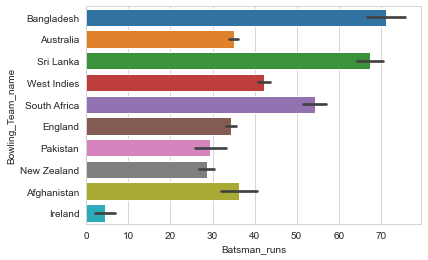

In [31]:
sb.barplot(x = 'Batsman_runs', y = 'Bowling_Team_name', data = player_balls)

<AxesSubplot:xlabel='Dismissal_type', ylabel='Batsman_runs'>

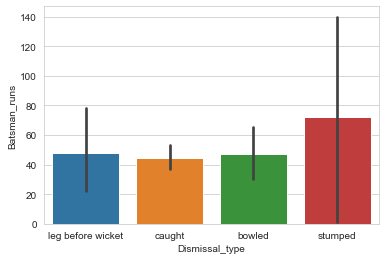

In [32]:
sb.barplot(x = 'Dismissal_type', y = 'Batsman_runs', data = player_balls)

<AxesSubplot:xlabel='Innings_runs', ylabel='Batsman_runs'>

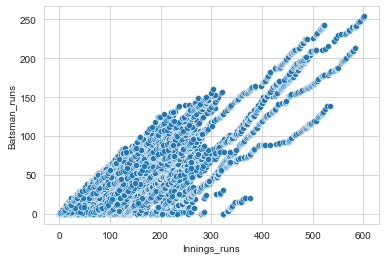

In [33]:
sb.scatterplot(x = 'Innings_runs', y = 'Batsman_runs', data = player_balls)

# Exporting Player Balls DataFrame as CSV

In [99]:
player_balls.to_csv('{0}--{1}--balls.csv'.format(PLAYER_NAME, TEAM_NAME))